# Lab 6: Alignment

# Notes to the Grader:
- As before, please give me all the feedback you can! Even mundane things about formatting or style, I'd really appreciate it

# Testing Bowtie2 #
# Sample 1: data/Lab6_data/mixed_reads1.fastq
**Command**: bowtie2 --very-fast --no-unal -x /data/references/hg19/hg19 -U /data/Lab6_data/mixed_reads1.fastq -S 2019_10_18_mixed_1.sam --un 2019_10_18_unaligned1.fastq

Output: 
1285441 (100.00%) were unpaired; of these:
    1030006 (80.13%) aligned 0 times
    234344 (18.23%) aligned exactly 1 time
    21091 (1.64%) aligned >1 times
19.87% overall alignment rate

Thus ~19.87% of reads are likely from human contaminants

# Sample 2: /data/Lab6_data/mixed_reads2.fastq
Command: bowtie2 --very-fast --no-unal -x /data/references/hg19/hg19 -U /data/Lab6_data/mixed_reads2.fastq -S 2019_10_18_mixed_2.sam --un 2019_10_18_unaligned2.fastq

Output:
1285441 reads; of these:
  1285441 (100.00%) were unpaired; of these:
    1030191 (80.14%) aligned 0 times
    234139 (18.21%) aligned exactly 1 time
    21111 (1.64%) aligned >1 times
19.86% overall alignment rate

Thus, 19.86% of the reads are likely from human contaminants 

# Bowtie2 on aligned Reads:
2019_10_18_unaligned2.fastq and 2019_10_18_unaligned1.fastq now contain likely bacterial reads:

We now want to see how much is present of bacterial dna

Shawllana database found here: /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1

# For Sample 1: 
**Command**:
bowtie2 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -U ./2019_10_18_unaligned1.fastq -S 2019_10_18_nonhuman_1.sam --un 2019_10_18_nonhuman_nonshewnella_1
.fastq

1030006 reads; of these:
  1030006 (100.00%) were unpaired; of these:
    268017 (26.02%) aligned 0 times
    710825 (69.01%) aligned exactly 1 time
    51164 (4.97%) aligned >1 times
73.98% overall alignment rate

## For Sample 2:
bowtie2 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -U ./2019_10_18_unaligned2.fastq -S 2019_10_18_nonhuman_2.sam --un 2019_10_18_nonhuman_nonshewnella_2.fastq

1030191 reads; of these:
  1030191 (100.00%) were unpaired; of these:
    465755 (45.21%) aligned 0 times
    528050 (51.26%) aligned exactly 1 time
    36386 (3.53%) aligned >1 times
54.79% overall alignment rate

# Outputs with "Very sensitive":
## Sample 1:
(Relatively similar)
1030006 reads; of these:
  1030006 (100.00%) were unpaired; of these:
    266514 (25.87%) aligned 0 times
    711311 (69.06%) aligned exactly 1 time
    52181 (5.07%) aligned >1 times
74.13% overall alignment rate

## Sample 2:
1030191 reads; of these:
  1030191 (100.00%) were unpaired; of these:
    462099 (44.86%) aligned 0 times
    530858 (51.53%) aligned exactly 1 time
    37234 (3.61%) aligned >1 times
55.14% overall alignment rate

## Converting to BAM and finding depth:
** Commands Run: **
samtools view -S -b 2019_10_18_nonhuman_1.sam > 2019_10_18_nonhuman_1.bam
  479  samtools view -S -b 2019_10_18_nonhuman_2.sam > 2019_10_18_nonhuman_2.bam
  480  samtools sort 2019_10_18_nonhuman_1.bam > 2019_10_18_nonhuman_1_sorted.bam
  483  samtools sort 2019_10_18_nonhuman_2.bam > 2019_10_18_nonhuman_2_sorted.bam
  486  history|grep samtools|less
  487  samtools index 2019_10_18_nonhuman_2_sorted.bam
  488  samtools index 2019_10_18_nonhuman_1_sorted.bam
  490  history|grep samtools|less
  491  samtools depth 2019_10_18_nonhuman_2_sorted.bam -a > 2019_10_18_nonhuman_2_depth.tab
  492  samtools depth 2019_10_18_nonhuman_1_sorted.bam -a > 2019_10_18_nonhuman_1_depth.tab
  
  

# Answers to Questions; Compiled:

## What	will	you	use	for	the	database?:
Since bowtie functions by using string matching to find its index files, I used "/data/references/hg19/hg19" which points bowtie to all files in */data/references/hg19/* that start with "hg19"

## Input Reads?
The input reads:
/data/Lab6_data/mixed_reads1.fastq
/data/Lab6_data/mixed_reads2.fastq

## If	you	use	the	--un	unaligned.fastq	option,	what	will	unaligned.fastq	contain?
The unaligned.fastq contains the sequencing reads that did not align to the genome with sufficient matching percentage.


# Aligning to Bacterium:

## If	you	use	the	--un	unaligned.fastq	option,	what	will	unaligned.fastq	contain?
For the respective sample ({1, 2}), the unaligned.fastq contains reads that did not align to the Shewanella genome. And since they are filtered reads, they also do not align to the Human genome either.

## What	percentage	of	your	filtered	library	didn’t	align	to	the	reference	genome? If	you	use	--verysensitive	instead	of	--very-fast,	does	this	percentage	increase	or	decrease?
(See above for numbers). This percentage increases, but very minimally

## What	is	the	min,	max,	and	mean	coverage	across	all	positions?
(Statistics shown below the coverage plots)

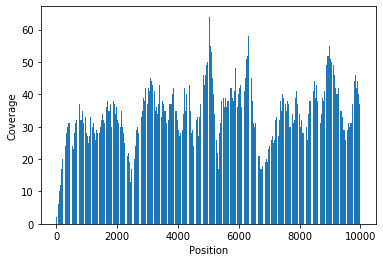

In [51]:
# Coverage for Sample 1:

import pandas
import pandas as pd
import matplotlib.pyplot as plt
x = pandas.read_csv("2019_10_18_nonhuman_1_depth.tab", sep='\t', header=-1)
# print(x)

# For simplicity, only show the first 10^6 positions
numPos = 10000

positions = list(x[1][0:numPos])
counts = list(x[2][0:numPos])
# print(counts[0:100], positions[0:100])
plt.bar(x = positions , height = counts)
plt.xlabel("Position")
plt.ylabel("Coverage")
plt.show()

# freq = count(counts)
# print(freq)


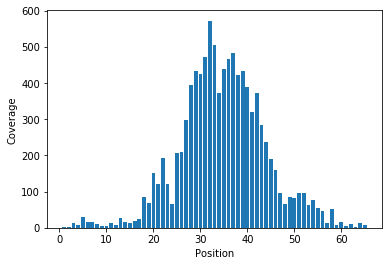

Min: 0
Max: 64
Mean: 33.8738


In [67]:
counts.sort()
# print(counts)
from itertools import groupby
import statistics
freqs = [len(list(group)) for key, group in groupby(counts)]

plt.bar(x = list(range(1, len(freqs)+1)) , height = freqs)
plt.xlabel("Position")
plt.ylabel("Coverage")
plt.show()
print("Min: " + str(min(counts)))
print("Max: " + str(max(counts)))
print("Mean: " + str(statistics.mean(counts)))

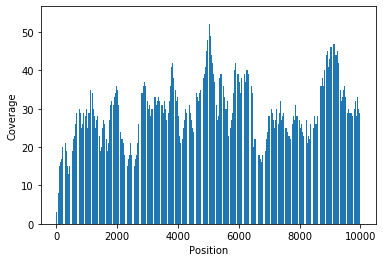

In [50]:
# For sample 2:
# ! ls
import pandas
import pandas as pd
import matplotlib.pyplot as plt
x = pandas.read_csv("2019_10_18_nonhuman_2_depth.tab", sep='\t', header=-1)
# print(x)

# For simplicity, only show the first 10^6 positions
numPos = 10000

positions = list(x[1][0:numPos])
counts = list(x[2][0:numPos])
# print(counts[0:100], positions[0:100])
plt.bar(x = positions , height = counts)
plt.xlabel("Position")
plt.ylabel("Coverage")
plt.show()

# freq = count(counts)
# print(freq)


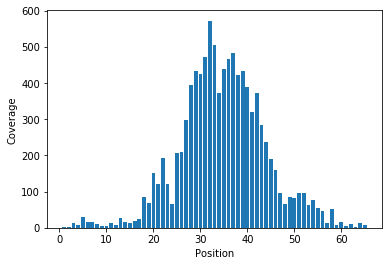

Min: 0
Max: 64
Mean: 33.8738


In [68]:
# Stolen from this stack overflow page: 
    # https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045
# print(counts)
# print(type(counts))
counts.sort()
# print(counts)
from itertools import groupby
import statistics
freqs = [len(list(group)) for key, group in groupby(counts)]

plt.bar(x = list(range(1, len(freqs)+1)) , height = freqs)
plt.xlabel("Position")
plt.ylabel("Coverage")
plt.show()
print("Min: " + str(min(counts)))
print("Max: " + str(max(counts)))
print("Mean: " + str(statistics.mean(counts)))

In [ ]:
def extract_coverage(tab_file):
    